# Sprintセグメンテーション1

KaggleのTGS Salt Identification Challengeのデータセットを使用し、セグメンテーションを行います。  
TGS Salt Identification Challenge | Kaggle  
https://www.kaggle.com/c/tgs-salt-identification-challenge  

セグメンテーション手法としてU-Net[1]を使います。  

[1]O.Ronneberger, P.Fischer, T.Brox. U-Net: Convolutional Networks for   Biomedical Image Segmentation. Medical Image Computing and   Computer-Assisted Intervention (MICCAI), Springer, LNCS, Vol.9351:   234–241, 2015  

https://arxiv.org/pdf/1505.04597.pdf  

# Google Colaboratoryの初期設定

In [ ]:
# 自分のマイドライブにマウントする
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
%cd /content/drive/My Drive/unet-master/

/content/drive/My Drive/unet-master


In [ ]:
ls

data/              img/     model.py      trainUnet.ipynb
dataPrepare.ipynb  LICENSE  __pycache__/  unet_membrane.hdf5
data.py            main.py  README.md


In [ ]:
#!ls

In [ ]:
#!unzip test.zip

In [ ]:
#!unzip train.zip

In [ ]:
#!unzip competition_data.zip

In [ ]:
#!pip unisntall tensorflow
#!pip install tensorflow==1.15

# 【問題1】学習・推定

以下のKeras実装を使用して学習・推定を行ってください。

zhixuhao/unet: unet for image segmentation

やったこと  
→データをkaggleのデータに置き換える。   

/unet-master_TGS/data/membrane/train　フォルダの  
・aug <- 全てのファイルを削除  
・image <- /tgs-salt-identification-challenge/competition_data/train/images の画像ファイルに置き換える  
・label <-  /tgs-salt-identification-challenge/competition_data/train/masks の画像ファイルに置き換える  

/unet-master_TGS/data/membrane/test　フォルダを  
/Users/mori/Desktop/tgs-salt-identification-challenge/competition_data/test の画像ファイルに置き換える  

test の画像ファイル数は、下記のようにハードコーディングされているので、画像ファイル数は30とする。  
画像ファイル数を変更する場合は下記を変更する。  
~~~
main.py
testGene = testGenerator("data/membrane/test") * 第２引数が画像ファイル数に該当  
results = model.predict_generator(testGene,30,verbose=1)
saveResult("data/membrane/test",results)
~~~

In [10]:
!python main.py

Using TensorFlow backend.
2020-07-05 15:00:57.552059: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2020-07-05 15:00:59.307664: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-07-05 15:00:59.333539: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-07-05 15:00:59.334523: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla K80 computeCapability: 3.7
coreClock: 0.8235GHz coreCount: 13 deviceMemorySize: 11.17GiB deviceMemoryBandwidth: 223.96GiB/s
2020-07-05 15:00:59.334600: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2020-07-05 15:00:59.337628: I tensorflow/str

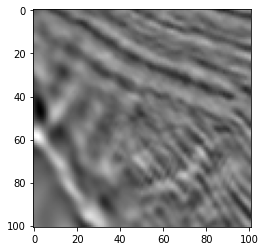

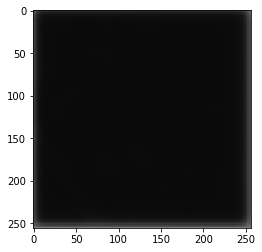

In [25]:
from matplotlib import pyplot as plt
from keras.preprocessing.image import load_img

im = load_img("/content/drive/My Drive/unet-master/data/membrane/test/0.png")
im_pred = load_img("/content/drive/My Drive/unet-master/data/membrane/test/0_predict.png")

plt.imshow(im)
plt.show()
plt.imshow(im_pred)
plt.show()

# 【問題2】コードリーディング

U-Netのモデリングは"model.py"で実施    

下記、Decode時にEncode時の値を利用している。  

merge6 = concatenate([drop4,up6], axis = 3) 図の20に該当  
merge7 = concatenate([conv3,up7], axis = 3) 図の25に該当
merge8 = concatenate([conv2,up8], axis = 3) 図の30に該当
merge9 = concatenate([conv1,up9], axis = 3) 図の34に該当

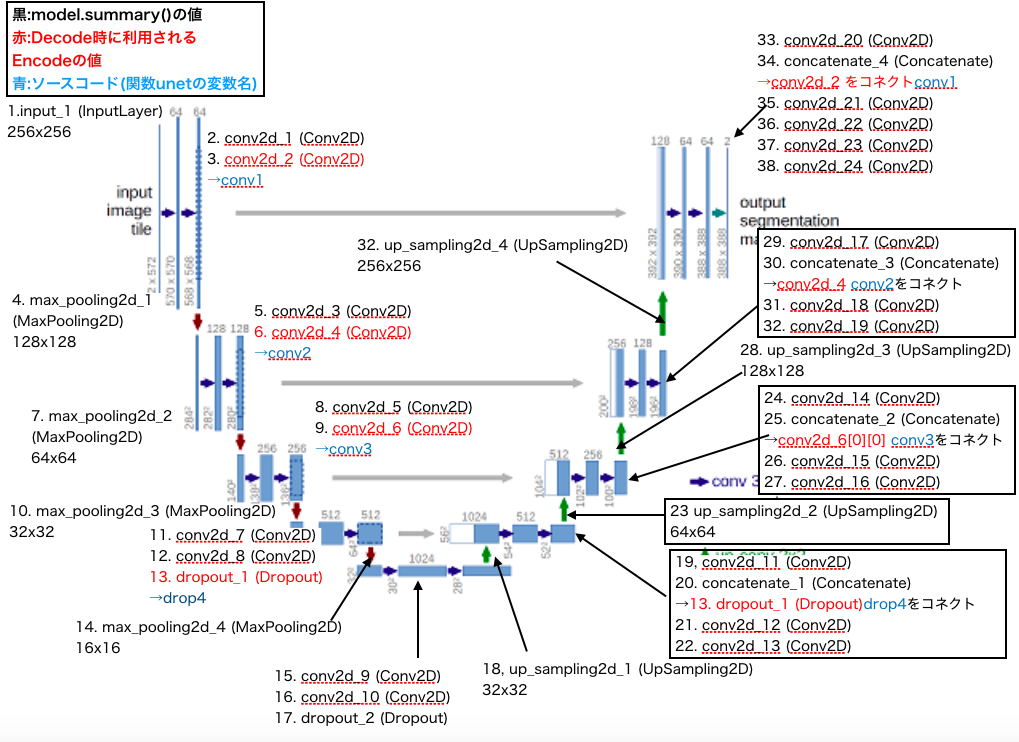

In [3]:
from IPython.display import Image
Image("Unet.png")

~~~
def unet(pretrained_weights = None,input_size = (256,256,1)):
    inputs = Input(input_size)
    
    # 1, 2, 3, 4
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    
    # 5, 6, 7
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    
    # 8, 9, 10
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    
    # 11, 12, 13, 14
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    # 15, 16, 17
    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
    drop5 = Dropout(0.5)(conv5)

    # 18, 19, 20, 21, 22
    up6 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop5))
    merge6 = concatenate([drop4,up6], axis = 3)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)

    # 23, 24, 25, 26, 27
    up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
    merge7 = concatenate([conv3,up7], axis = 3)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)

    # 28, 29, 30, 31, 32
    up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
    merge8 = concatenate([conv2,up8], axis = 3)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)

    # 33, 34, 35, 36, 37 ,38
    up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
    merge9 = concatenate([conv1,up9], axis = 3)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv9 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv10 = Conv2D(1, 1, activation = 'sigmoid')(conv9)

    model = Model(input = inputs, output = conv10)

    model.compile(optimizer = Adam(lr = 1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])
    
    #model.summary()

    if(pretrained_weights):
    	model.load_weights(pretrained_weights)

    return model
~~~

In [26]:
# model.pyのmodel.summary()のコメントアウトを削除
# 他の処理をコメントアウト(モデルを表示したい)
!python main.py

Using TensorFlow backend.
2020-07-05 15:24:36.517053: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2020-07-05 15:24:38.159438: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-07-05 15:24:38.183262: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-07-05 15:24:38.184047: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla K80 computeCapability: 3.7
coreClock: 0.8235GHz coreCount: 13 deviceMemorySize: 11.17GiB deviceMemoryBandwidth: 223.96GiB/s
2020-07-05 15:24:38.184104: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2020-07-05 15:24:38.186856: I tensorflow/str